In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('./Datasets/train.csv')

In [ ]:
X = data.drop('label',axis = 1)
y = data.drop(X.columns, axis = 1)

In [ ]:
X['text'].fillna(X['title'],inplace = True)

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vect = TfidfVectorizer(use_idf = True,stop_words = stop_words)

In [ ]:
X_vect = tfidf_vect.fit_transform(X['text'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_vect,y,test_size = 0.2)

### Using Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mul_nb = MultinomialNB()

In [ ]:
mul_nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred_nb = mul_nb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc_nb = accuracy_score(pred_nb,y_test)

In [ ]:
acc_nb

0.8625

[[2057  548]
 [  24 1531]]


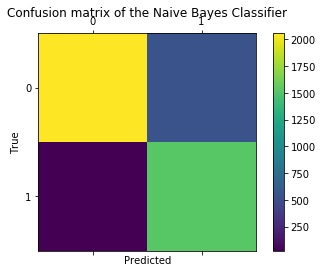

In [ ]:

cm = confusion_matrix(pred_nb,y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Naive Bayes Classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### SGD Classifier

In [1]:
from sklearn.linear_model import SGDClassifier

In [2]:
sgd_clf = SGDClassifier()

In [3]:
sgd_clf.fit(X_train,y_train)

NameError: ignored

In [ ]:
pred = sgd_clf.predict(X_test)

In [ ]:
acc_sgd_clf = accuracy_score(pred,y_test)

In [ ]:
acc_sgd_clf

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:

cm = confusion_matrix(pred,y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the SGD Classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

In [ ]:
pred_log_reg = log_reg.predict(X_test)

In [ ]:
acc_log_reg = accuracy_score(pred_log_reg,y_test)

In [ ]:
acc_log_reg

In [ ]:

cm = confusion_matrix(pred_log_reg,y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of Logistic Regression')
fig.colorbar(cax)
#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()